**Importing libraries**

In [1]:
import json
import glob
import pandas as pd
import os
import shutil
import cv2
import numpy as np
from matplotlib import pyplot as plt

**Fetch labels file**

In [ ]:
json_file_path = r"C:\Users\moham\Carla\archive\bdd100k_labels_release\bdd100k\labels"

In [11]:
labels_files_name = glob.glob(json_file_path)

In [13]:
f = open(labels_files_name[0])
data = json.load(f)

**Extract data from the json files**

In [30]:
def data_from_json_file(file_name):
  info_dict = {}
  f = open(file_name)
  data = json.load(f)
  for j in data:
    for i in j.keys() :
      if i == 'name':
        info_dict[j['name']] = {'bboxes':[]}
        # img = cv2.imread('/content/drive/MyDrive/P2M/Data/bdd100k/images/track/'+j['name'][:17]+'/'+j['name'])
        # info_dict[j['name']]['size'] = img.shape
      elif i == 'labels':
        for k in j[i]:
          bbox = {}
          for l in k.keys() :
            if l == 'category':
              bbox['class'] = k['category']
            elif l == 'box2d':
              bbox['box2d'] = k[l]
            elif l == 'poly2d':
              bbox['poly2d'] = k[l][0]['vertices']
          info_dict[j['name']]['bboxes'].append(bbox)
  f.close()
  return info_dict

In [31]:
info_dict = {}
info_dict = data_from_json_file(labels_files_name[0])

In [38]:
info_dict1 = {}
info_dict1 = data_from_json_file(labels_files_name[1])

In [235]:
#Taking a sample of 4000 pictures
dataset_subset = {key: info_dict[key] for count, key in enumerate(info_dict.keys()) if count < 4000}

In [236]:
#Taking a Validation set of 1000 pictures
dataset_subset_val = {key: info_dict[key] for count, key in enumerate(info_dict.keys()) if count > 4000 and count < 5001}

In [237]:
#Saving caracteristics to json file
with open("dataset_subset_val.json", "w") as outfile:
    json.dump(dataset_subset_val, outfile)

In [246]:
len(dataset_subset.keys())

4000

In [244]:
# destination path
directory = "Unet_test_on_data_val"
os.mkdir(directory)
dest = directory+"/"
images_path = r"C:\Users\moham\Carla\archive\archive\bdd100k\bdd100k\images\100k\train/"
for image_name in dataset_subset_val.keys():

    shutil.copyfile(images_path+image_name, dest+image_name)

In [123]:
def convert_list_to_int_list(li):

  lisout = []
  for i in li:
    lisin = []
    for j in i:
      lisin.append(int(j))
    lisout.append(lisin)
  return lisout

In [245]:
# Making the Mask
directory = "Unet_test_on_data_val-labels"
try:
    os.mkdir(directory)
except:
    pass
path = "Unet_test_on_data_val/"
dest = "Unet_test_on_data_val-labels/"
for image_name in dataset_subset_val.keys():
    img = cv2.imread(path+image_name)

    img = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)
    label = np.zeros(img.shape[:2])
    for i in dataset_subset_val[image_name]['bboxes']:
        if i['class'] == 'drivable area' :
            cv2.fillPoly(label, pts=[np.array(convert_list_to_int_list(i['poly2d']))], color=(255, 255, 255))
    cv2.imwrite(dest+image_name, label)

In [247]:
#Saving validation to json file
with open("dataset_subset.json", "w") as outfile:
    json.dump(dataset_subset, outfile)

In [253]:
#Loading caracteristics to json file
with open('dataset_subset.json') as json_file:
    data = json.load(json_file)

In [248]:
directory = "Unet_test_on_data"
os.mkdir(directory)

In [249]:
images_files_name = glob.glob("archive/bdd100k/bdd100k/images/100k/train/*.jpg") 

In [250]:
images_files_name = [h[-21:] for h in images_files_name]

In [251]:
check =  all(item in images_files_name for item in data.keys())

AttributeError: 'Data' object has no attribute 'keys'

Copying desired data to the folder

In [254]:
dest = "Unet_test_on_data/"
path = "archive/bdd100k/bdd100k/images/100k/train/"
for image_name in data.keys():
    shutil.copyfile(path+image_name, dest+image_name)

In [255]:
directory = "Unet_test_on_data-labels"
os.mkdir(directory)

In [256]:
path = "Unet_test_on_data/"
dest = "Unet_test_on_data-labels/"
for image_name in data.keys():
    img = cv2.imread(path+image_name)

    img = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)
    label = np.zeros(img.shape[:2])
    for i in data[image_name]['bboxes']:
        if i['class'] == 'drivable area' :
            cv2.fillPoly(label, pts=[np.array(convert_list_to_int_list(i['poly2d']))], color=(255, 255, 255))
    cv2.imwrite(dest+image_name, label)

<function matplotlib.pyplot.show(close=None, block=None)>

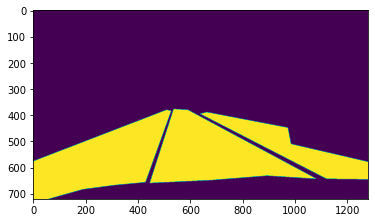

In [257]:
img = cv2.imread(dest+list(data.keys())[5])

img = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)
label = np.zeros(img.shape[:2])
for i in data[list(data.keys())[5]]['bboxes']:
    if i['class'] == 'drivable area' :
        cv2.fillPoly(label, pts=[np.array(convert_list_to_int_list(i['poly2d']))], color=(255, 255, 255))
cv2.imwrite('hey.jpg', label)
plt.imshow(label)
plt.show


<function matplotlib.pyplot.show(close=None, block=None)>

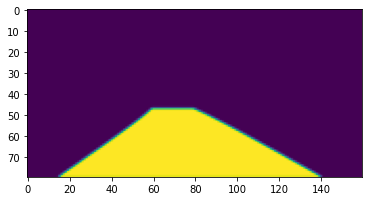

In [258]:
plt.imshow(train_labels[0])
plt.show

In [216]:
class Data():
    def __init__(self):
        self.X_train = []
        self.Y_train = []
        self.train_path = "Unet_test_on_data/"
        self.labels_path = "Unet_test_on_data-labels/"
    
    def process_img(self, img_path, img_size, train = True):
        img = cv2.imread(img_path)
        img = cv2.resize(img, (img_size,img_size))
        
        img = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)
        if train:
            self.X_train.append(img/np.max(img))
        else:
            self.Y_train.append(img/np.max(img))
            
        
    def process_images_train(self, img_size):
        for image_path in glob.glob(self.train_path+"*.jpg"):
            self.process_img(image_path, img_size)
            
    def process_images_labels(self, img_size):
        for image_path in glob.glob(self.labels_path+"*.jpg"):
            self.process_img(image_path, img_size, train = False)
    
    def data(self):
        updated_X_train = np.array(self.X_train).reshape(int(np.array(self.X_train).ravel().shape[0])//128//128,128,128,1).astype('float64')
        updated_Y_train = np.array(self.Y_train).reshape(int(np.array(self.Y_train).ravel().shape[0])//128//128,128,128,1).astype('float64')
        return updated_X_train, updated_Y_train

In [217]:
data = Data()
data.process_images_train(128)
data.process_images_labels(128)
updated_X_train, updated_Y_train = data.data()

C:\Users\moham\AppData\Local\Temp/ipykernel_17504/2252622949.py:16: RuntimeWarning: invalid value encountered in true_divide
  self.Y_train.append(img/np.max(img))
